Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [97]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Osobno\AppData\Roaming\Python\Python310\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [98]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [99]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje

fi = PolynomialFeatures(1, interaction_only=False,
                        include_bias=True).fit_transform(X)

fi

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [100]:
from numpy import linalg
# Vaš kôd ovdje

w = linalg.inv(fi.T @ fi) @  fi.T @ y
print(w)

w2 = linalg.pinv(fi) @ y
print(w2)


[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

2.042857142857143


Text(0, 0.5, 'y')

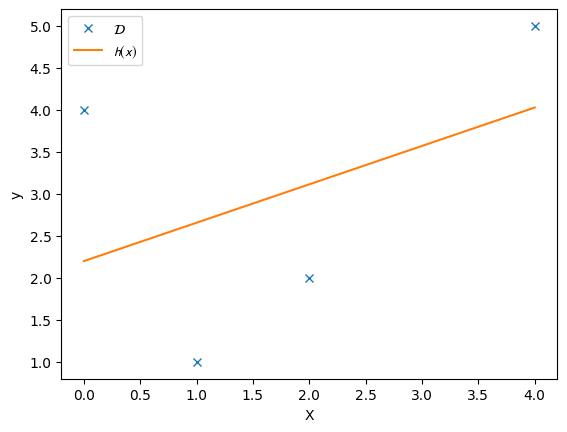

In [101]:
from cProfile import label
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
h = fi @ w
print(mean_squared_error(y, h)) 

plt.plot(X, y, 'x', label=r"$\mathcal{D}$")
plt.plot(X, h, label=r"$\mathcal{h(x)}$")
plt.legend(loc="best")
plt.xlabel("X")
plt.ylabel("y")

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [102]:
# Vaš kôd ovdje

try:
    w = linalg.inv(fi) @ y
except:
    print("Cannot invert non-square matrix")

Cannot invert non-square matrix


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [103]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

lr = LinearRegression().fit(fi, y)

w = np.array([lr.intercept_, lr.coef_[1]])
print(w)

h = lr.predict(fi)

mean_squared_error(y, h)


[2.2        0.45714286]


2.042857142857143

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [104]:
from numpy.random import normal


def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    y=[]
    for instance in X:
        y.append(f(instance) + np.random.normal(0, scale=noise))
    return np.array(y)


In [105]:
def make_instances(x1, x2, N):
    return np.array([np.array([x]) for x in np.linspace(x1, x2, N)])


In [106]:
# Vaš kôd ovdje
def f(x): 
    return (5 + x - 2*(x**2) - 5*(x**3))


X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

Text(0, 0.5, 'y')

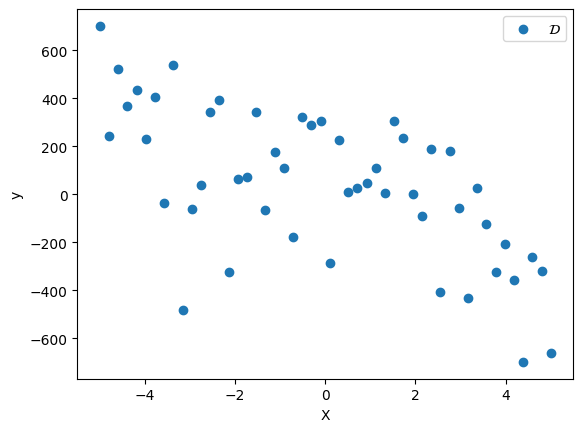

In [107]:
# Vaš kôd ovdje
plt.scatter(X, y, label=r"$\mathcal{D}$")
plt.legend(loc="best")

plt.xlabel("X")
plt.ylabel("y")


### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Text(0, 0.5, 'y')

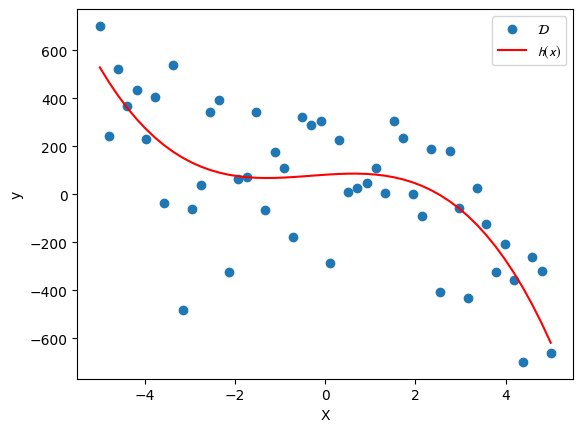

In [108]:
# Vaš kôd ovdje
fi = PolynomialFeatures(3).fit_transform(X)

w = linalg.pinv(fi) @ y

h = fi @ w

mean_squared_error(y, h)

plt.scatter(X, y, label=r"$\mathcal{D}$")
plt.plot(X, h, c='r', label=r"$\mathcal{h(x)}$")
plt.legend(loc="best")
plt.xlabel("X")
plt.ylabel("y")

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

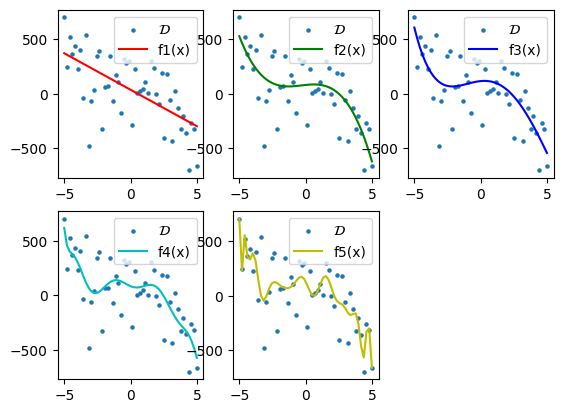

In [109]:
# Vaš kôd ovdje

d_arr = [1, 3, 5, 10, 20]

fi = []

w = []

h = []

for idx, d in enumerate(d_arr):
    fi.append(PolynomialFeatures(d).fit_transform(X))
    w.append(linalg.pinv(fi[idx]) @ y)
    h.append(fi[idx] @ w[idx])

c = "rgbcy"

for idx in range(5):
    #print(mean_squared_error(y, h[idx]))
    plt.subplot(2, 3, idx + 1)
    plt.scatter(X, y, s=5, label=r"$\mathcal{D}$")
    plt.plot(X, h[idx], c=c[idx], label="f{0}(x)".format(idx + 1))
    plt.legend(loc="upper right")
    

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

Text(0, 0.5, 'y')

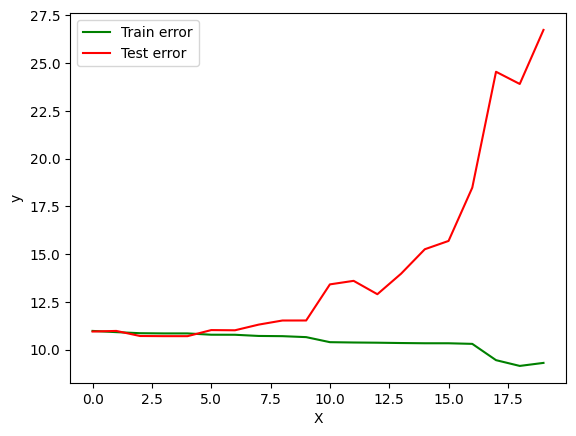

In [110]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje

fi_train = []

fi_test = []

w = []

h_train = []

h_test = []

train_error = []

test_error = []

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5)

d = range(0,20)

for i in d:
    fi_train.append(PolynomialFeatures(i+1).fit_transform(X_train))
    fi_test.append(PolynomialFeatures(i+1).fit_transform(X_test))

    w.append(linalg.pinv(fi_train[i]) @ y_train)

    h_train.append(fi_train[i] @ w[i])
    h_test.append(fi_test[i] @ w[i])
    
    train_error.append(mean_squared_error(y_train, h_train[i]))
    test_error.append(mean_squared_error(y_test, h_test[i]))

plt.plot(d, np.log(train_error), c="g", label="Train error")
plt.plot(d, np.log(test_error), c="r", label="Test error")
plt.legend(loc="best")
plt.xlabel("X")
plt.ylabel("y")

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

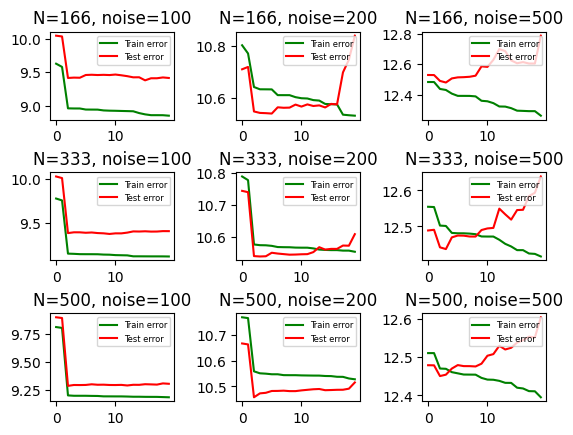

In [111]:
# Vaš kôd ovdje
X = make_instances(-5, 5, 1000)
y = make_labels(X, f)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.5, test_size=0.5)

# X_train_list = [X_train[:len(X_train)//3],
#                 X_train[len(X_train) // 3:(2*len(X_train)//3)],
#                 X_train[(2*len(X_train)//3):]]

noise = [100, 200, 500]
N = [len(X_train)//3, (2*len(X_train))//3, len(X_train)]

y_train = np.array([make_labels(X_train, f, n) for n in noise])
y_test = np.array([make_labels(X_test, f, n) for n in noise])

fig, axes = plt.subplots(3, 3)
fig.subplots_adjust(wspace=0.5, hspace=0.6)

for i in range(1, 10):
    fi_train = []
    fi_test = []
    w = []
    h_train = []
    h_test = []
    train_error = []
    test_error = []
    d = range(0, 20)

    for j in d:

        #noise[(i-1) % 3]
        # N[(i-1)//3]

        fi_train.append(PolynomialFeatures(
            j+1).fit_transform(X_train[:N[(i-1)//3]]))
        fi_test.append(PolynomialFeatures(
            j+1).fit_transform(X_test[:N[(i-1)//3]]))

        w.append(linalg.pinv(fi_train[j]) @ y_train[(i-1) % 3][:N[(i-1)//3]])

        h_train.append(fi_train[j] @ w[j])
        h_test.append(fi_test[j] @ w[j])

        train_error.append(mean_squared_error(
            y_train[(i-1) % 3][:N[(i-1)//3]], h_train[j]))
        # print("TEST:", len(train_error), len(y_train), len(y_train[(i-1) % 3]), len(y_train[(i-1) % 3][:N[(i-1)//3]]),
        # len(h_train[j]),j)
        test_error.append(mean_squared_error(
            y_test[(i-1) % 3][:N[(i-1)//3]], h_test[j]))

    axes[(i-1)//3, (i-1) % 3].set_title("N=" +
                                    str(N[(i-1)//3])+", noise="+str(noise[(i-1) % 3]))
    axes[(i-1)//3, (i-1) % 3].plot(d,
                                   np.log(train_error), c="g", label="Train error")
    axes[(i-1)//3, (i-1) % 3].plot(d,
                                   np.log(test_error), c="r", label="Test error")
    axes[(i-1)//3, (i-1) % 3].legend(loc="upper right",prop={'size':6})


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [112]:
# Vaš kôd ovdje
X = np.array([[0], [1], [2], [4]])
y = np.array([4, 1, 2, 5])

fi = PolynomialFeatures(3).fit_transform(X)

w = [linalg.inv(fi.T @ fi + la*np.identity(4)) @  fi.T @ y for la in [0, 1, 10]]

w

[array([ 4.        , -5.91666667,  3.375     , -0.45833333]),
 array([ 1.79567372, -0.24729075, -0.0175289 ,  0.07014758]),
 array([0.43312265, 0.11060671, 0.13827839, 0.03093411])]

### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [113]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

w = None
for la in [0, 1, 10]:
    r = Ridge(alpha=la).fit(fi,y)
    w = np.append(r.intercept_, r.coef_[1:])
    
    print("For lambda = {0}, w = {1}".format(la,w))


For lambda = 0, w = [ 4.         -5.91666667  3.375      -0.45833333]
For lambda = 1, w = [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
For lambda = 10, w = [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

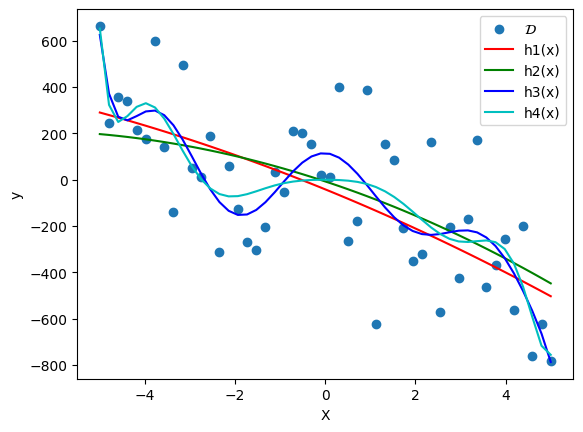

In [114]:
# Vaš kôd ovdje

la = [0, 100]
d = [2, 10]

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)

fi1 = PolynomialFeatures(d[0]).fit_transform(X)
fi2 = PolynomialFeatures(d[1]).fit_transform(X)

w1 = linalg.inv(fi1.T @ fi1 + la[0]*np.identity(3)) @  fi1.T @ y
w2 = linalg.inv(fi1.T @ fi1 + la[1]*np.identity(3)) @  fi1.T @ y
w3 = linalg.inv(fi2.T @ fi2 + la[0]*np.identity(11)) @  fi2.T @ y
w4 = linalg.inv(fi2.T @ fi2 + la[1]*np.identity(11)) @  fi2.T @ y

h_list = [fi1 @ w1, fi1 @ w2, fi2 @ w3, fi2 @ w4]

plt.scatter(X, y, label=r"$\mathcal{D}$")

plt.xlabel("X")
plt.ylabel("y")

c = "rgbc"
for idx, h in enumerate(h_list):
    plt.plot(X, h, c=c[idx], label="h{0}(x)".format(idx+1))
plt.legend(loc="best")


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


Text(0, 0.5, 'error')

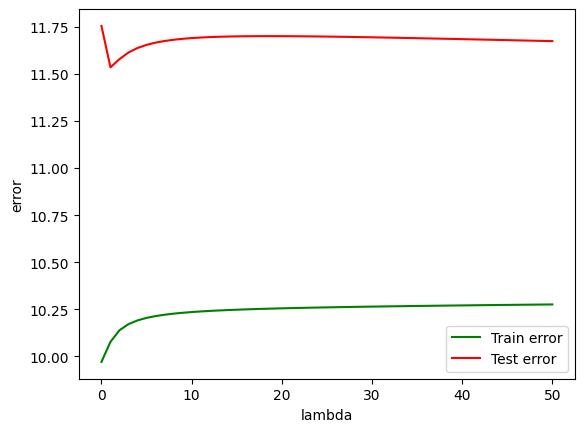

In [115]:
# Vaš kôd ovdje
fi_train = []

fi_test = []

w = []

h_train = []

h_test = []

train_error = []

test_error = []

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.5, test_size=0.5)

la_range = range(0, 51)
for la in la_range:

    fi_train = PolynomialFeatures(10).fit_transform(X_train)
    fi_test = PolynomialFeatures(10).fit_transform(X_test)

    #print(fi_train, len(y_train))
    w.append(linalg.inv(fi_train.T @ fi_train +
             la*np.identity(11)) @  fi_train.T @ y_train)

    h_train.append(fi_train @ w[la])
    h_test.append(fi_test @ w[la])

    train_error.append(mean_squared_error(y_train, h_train[la]))
    test_error.append(mean_squared_error(y_test, h_test[la]))

plt.plot(la_range, np.log(train_error), c="g", label="Train error")
plt.plot(la_range, np.log(test_error), c="r", label="Test error")
plt.legend(loc="best")
plt.xlabel("lambda")
plt.ylabel("error")


### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [116]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

Text(0, 0.5, 'y')

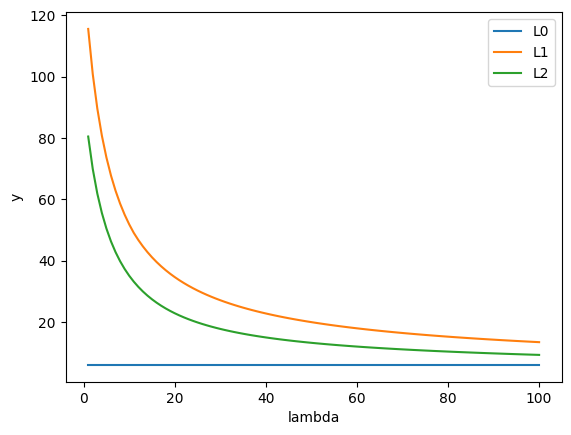

In [117]:
import math
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
L0=[]
L1=[]
L2=[]

la_range = range(1,101)

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5)

fi_train = PolynomialFeatures(5).fit_transform(X_train)

for la in la_range:
    #r = Ridge(alpha=la).fit(fi_train, y_train)
    #w = np.append(r.intercept_, r.coef_[1:])
    #print("For lambda = {0}, w = {1}".format(la,np.append(w.intercept_, w.coef_[1:])))
    w = linalg.inv(fi_train.T @ fi_train + la*np.identity(6)) @  fi_train.T @ y_train
    L0.append(nonzeroes(w))
    L1.append(sum(abs(w)))
    L2.append(math.sqrt(w.T @ w))

plt.plot(la_range, L0, label="L0")
plt.plot(la_range, L1, label="L1")
plt.plot(la_range, L2, label="L2")
plt.legend(loc="best")
plt.xlabel("lambda")
plt.ylabel("y")

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

Text(0, 0.5, 'y')

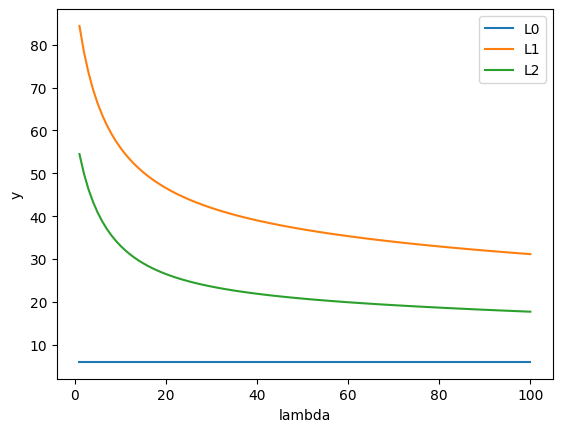

In [118]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
L0=[]
L1=[]
L2=[]

la_range = range(1,101)

X = make_instances(-5, 5, 50)
y = make_labels(X, f, 200)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5)

fi_train = PolynomialFeatures(5).fit_transform(X_train)

for la in la_range:
    l = Lasso(alpha=la).fit(fi_train, y_train)
    w = linalg.inv(fi_train.T @ fi_train + la*np.identity(6)) @  fi_train.T @ y_train
    L0.append(nonzeroes(w))
    L1.append(sum(abs(w)))
    L2.append(math.sqrt(w.T @ w))

plt.plot(la_range, L0, label="L0")
plt.plot(la_range, L1, label="L1")
plt.plot(la_range, L2, label="L2")
plt.legend(loc="best")
plt.xlabel("lambda")
plt.ylabel("y")

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [119]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

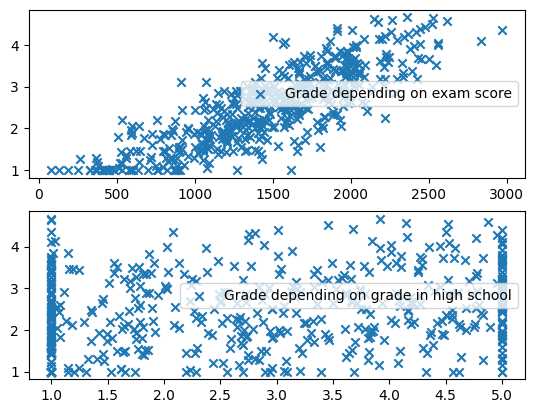

In [120]:
# Vaš kôd ovdje
plt.subplot(2,1,1)
plt.scatter(exam_score, grades_y, label='Grade depending on exam score', marker="x")
plt.legend(loc="center right")

plt.subplot(2,1,2)
plt.scatter(grade_in_highschool, grades_y, label='Grade depending on grade in high school', marker="x")
plt.legend(loc="center right")

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [153]:
# Vaš kôd ovdje
w = linalg.inv(grades_X.T @ grades_X + 0.01 *
               np.identity(2)) @  grades_X.T @ grades_y

w

array([0.00147711, 0.1106004 ])

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [155]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
scaler=StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_Y_fixed = scaler.fit_transform(grades_y.reshape(-1,1))

w = linalg.inv(grades_X_fixed.T @ grades_X_fixed + 0.01 *
               np.identity(2)) @  grades_X_fixed.T @ grades_Y_fixed

w


array([[0.81630375],
       [0.15167761]])

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [151]:
# Vaš kôd ovdje
last_column = np.array(np.transpose(np.matrix(grades_X_fixed[:, -1])))
grades_X_fixed_colinear = np.hstack([grades_X_fixed, last_column])


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [157]:
# Vaš kôd ovdje
w = linalg.inv(grades_X_fixed_colinear.T @ grades_X_fixed_colinear + 0.01 *
               np.identity(3)) @  grades_X_fixed_colinear.T @ grades_Y_fixed

w


array([[0.81630364],
       [0.07583957],
       [0.07583957]])

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [185]:
# Vaš kôd ovdje
w1 = []
w2 = []

for i in range(10):
    rnd_idx = np.random.choice(
        len(grades_X_fixed_colinear), len(grades_X_fixed_colinear)//2)
    grades_X = grades_X_fixed_colinear[rnd_idx]
    w1.append(linalg.inv(grades_X.T @ grades_X + 0.01 *
                         np.identity(3)) @  grades_X.T @ grades_Y_fixed[:len(grades_X_fixed_colinear)//2])
    w2.append(linalg.inv(grades_X.T @ grades_X + 1000 *
                         np.identity(3)) @  grades_X.T @ grades_Y_fixed[:len(grades_X_fixed_colinear)//2])
    print("i = {0},\n w1 = {1},\n w2 = {2}".format(i, w1[i], w2[i]))

w1_arr = np.array(w1)
w2_arr = np.array(w2)

for i in range(3):
    print("std{0}={1}".format(i+1, np.std(w1_arr[:,i])))

for i in range(3):
    print("std{0}={1}".format(i+4, np.std(w2_arr[:,i])))


i = 0,
 w1 = [[ 0.09496738]
 [-0.02223489]
 [-0.02223489]],
 w2 = [[ 0.01660157]
 [-0.00727687]
 [-0.00727687]]
i = 1,
 w1 = [[-0.05112904]
 [ 0.02142721]
 [ 0.02142721]],
 w2 = [[-0.0099372 ]
 [ 0.00656045]
 [ 0.00656045]]
i = 2,
 w1 = [[ 0.08968526]
 [-0.01240753]
 [-0.01240753]],
 w2 = [[ 0.01829313]
 [-0.00422319]
 [-0.00422319]]
i = 3,
 w1 = [[ 0.00121936]
 [-0.00181345]
 [-0.00181345]],
 w2 = [[ 0.00021675]
 [-0.00054838]
 [-0.00054838]]
i = 4,
 w1 = [[ 0.01580063]
 [-0.00419374]
 [-0.00419374]],
 w2 = [[ 0.00310332]
 [-0.00103715]
 [-0.00103715]]
i = 5,
 w1 = [[0.03327837]
 [0.00153843]
 [0.00153843]],
 w2 = [[0.00677956]
 [0.00035449]
 [0.00035449]]
i = 6,
 w1 = [[ 0.11434193]
 [-0.02541528]
 [-0.02541528]],
 w2 = [[ 0.02235404]
 [-0.0062232 ]
 [-0.0062232 ]]
i = 7,
 w1 = [[0.00056098]
 [0.03446985]
 [0.03446985]],
 w2 = [[0.00152922]
 [0.01127988]
 [0.01127988]]
i = 8,
 w1 = [[0.02907905]
 [0.05031756]
 [0.05031756]],
 w2 = [[0.00713036]
 [0.01723014]
 [0.01723014]]
i = 9,
 w1

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.